In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

Using TensorFlow backend.


In [6]:
df = pd.read_csv("market-price.csv")


In [8]:
df_norm = df.drop(['Date'], 1, inplace=True)

In [13]:
prediction_days = 30

df_train= df[:len(df)-prediction_days]
df_test= df[len(df)-prediction_days:]

In [15]:
training_set = df_train.values
training_set = min_max_scaler.fit_transform(training_set)

x_train = training_set[0:len(training_set)-1]
y_train = training_set[1:len(training_set)]
x_train = np.reshape(x_train, (len(x_train), 1, 1))

In [16]:
num_units = 4
activation_function = 'sigmoid'
optimizer = 'adam'
loss_function = 'mean_squared_error'
batch_size = 5
num_epochs = 100

# Initialize the RNN
regressor = Sequential()

# Adding the input layer and the LSTM layer
regressor.add(LSTM(units = num_units, activation = activation_function, input_shape=(None, 1)))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = optimizer, loss = loss_function)

# Using the training set to train the model
regressor.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs)

Epoch 1/100
334/334 [==============================] - 2s 5ms/step - loss: 0.3788
Epoch 2/100
334/334 [==============================] - 0s 518us/step - loss: 0.2299
Epoch 3/100
334/334 [==============================] - 0s 446us/step - loss: 0.1396
Epoch 4/100
334/334 [==============================] - 0s 429us/step - loss: 0.0882
Epoch 5/100
334/334 [==============================] - 0s 439us/step - loss: 0.0608
Epoch 6/100
334/334 [==============================] - 0s 491us/step - loss: 0.0479
Epoch 7/100
334/334 [==============================] - 0s 434us/step - loss: 0.0421
Epoch 8/100
334/334 [==============================] - 0s 438us/step - loss: 0.0397
Epoch 9/100
334/334 [==============================] - 0s 441us/step - loss: 0.0387
Epoch 10/100
334/334 [==============================] - 0s 441us/step - loss: 0.0382
Epoch 11/100
334/334 [==============================] - 0s 550us/step - loss: 0.0378
Epoch 12/100
334/334 [==============================] - 0s 450us/step - loss

334/334 [==============================] - 0s 619us/step - loss: 0.0012
Epoch 98/100
334/334 [==============================] - 0s 444us/step - loss: 0.0012
Epoch 99/100
334/334 [==============================] - 0s 452us/step - loss: 0.0012
Epoch 100/100
334/334 [==============================] - 0s 457us/step - loss: 0.0012


In [18]:
test_set = df_test.values

inputs = np.reshape(test_set, (len(test_set), 1))
inputs = min_max_scaler.transform(inputs)
inputs = np.reshape(inputs, (len(inputs), 1, 1))

predicted_price = regressor.predict(inputs)
predicted_price = min_max_scaler.inverse_transform(predicted_price)

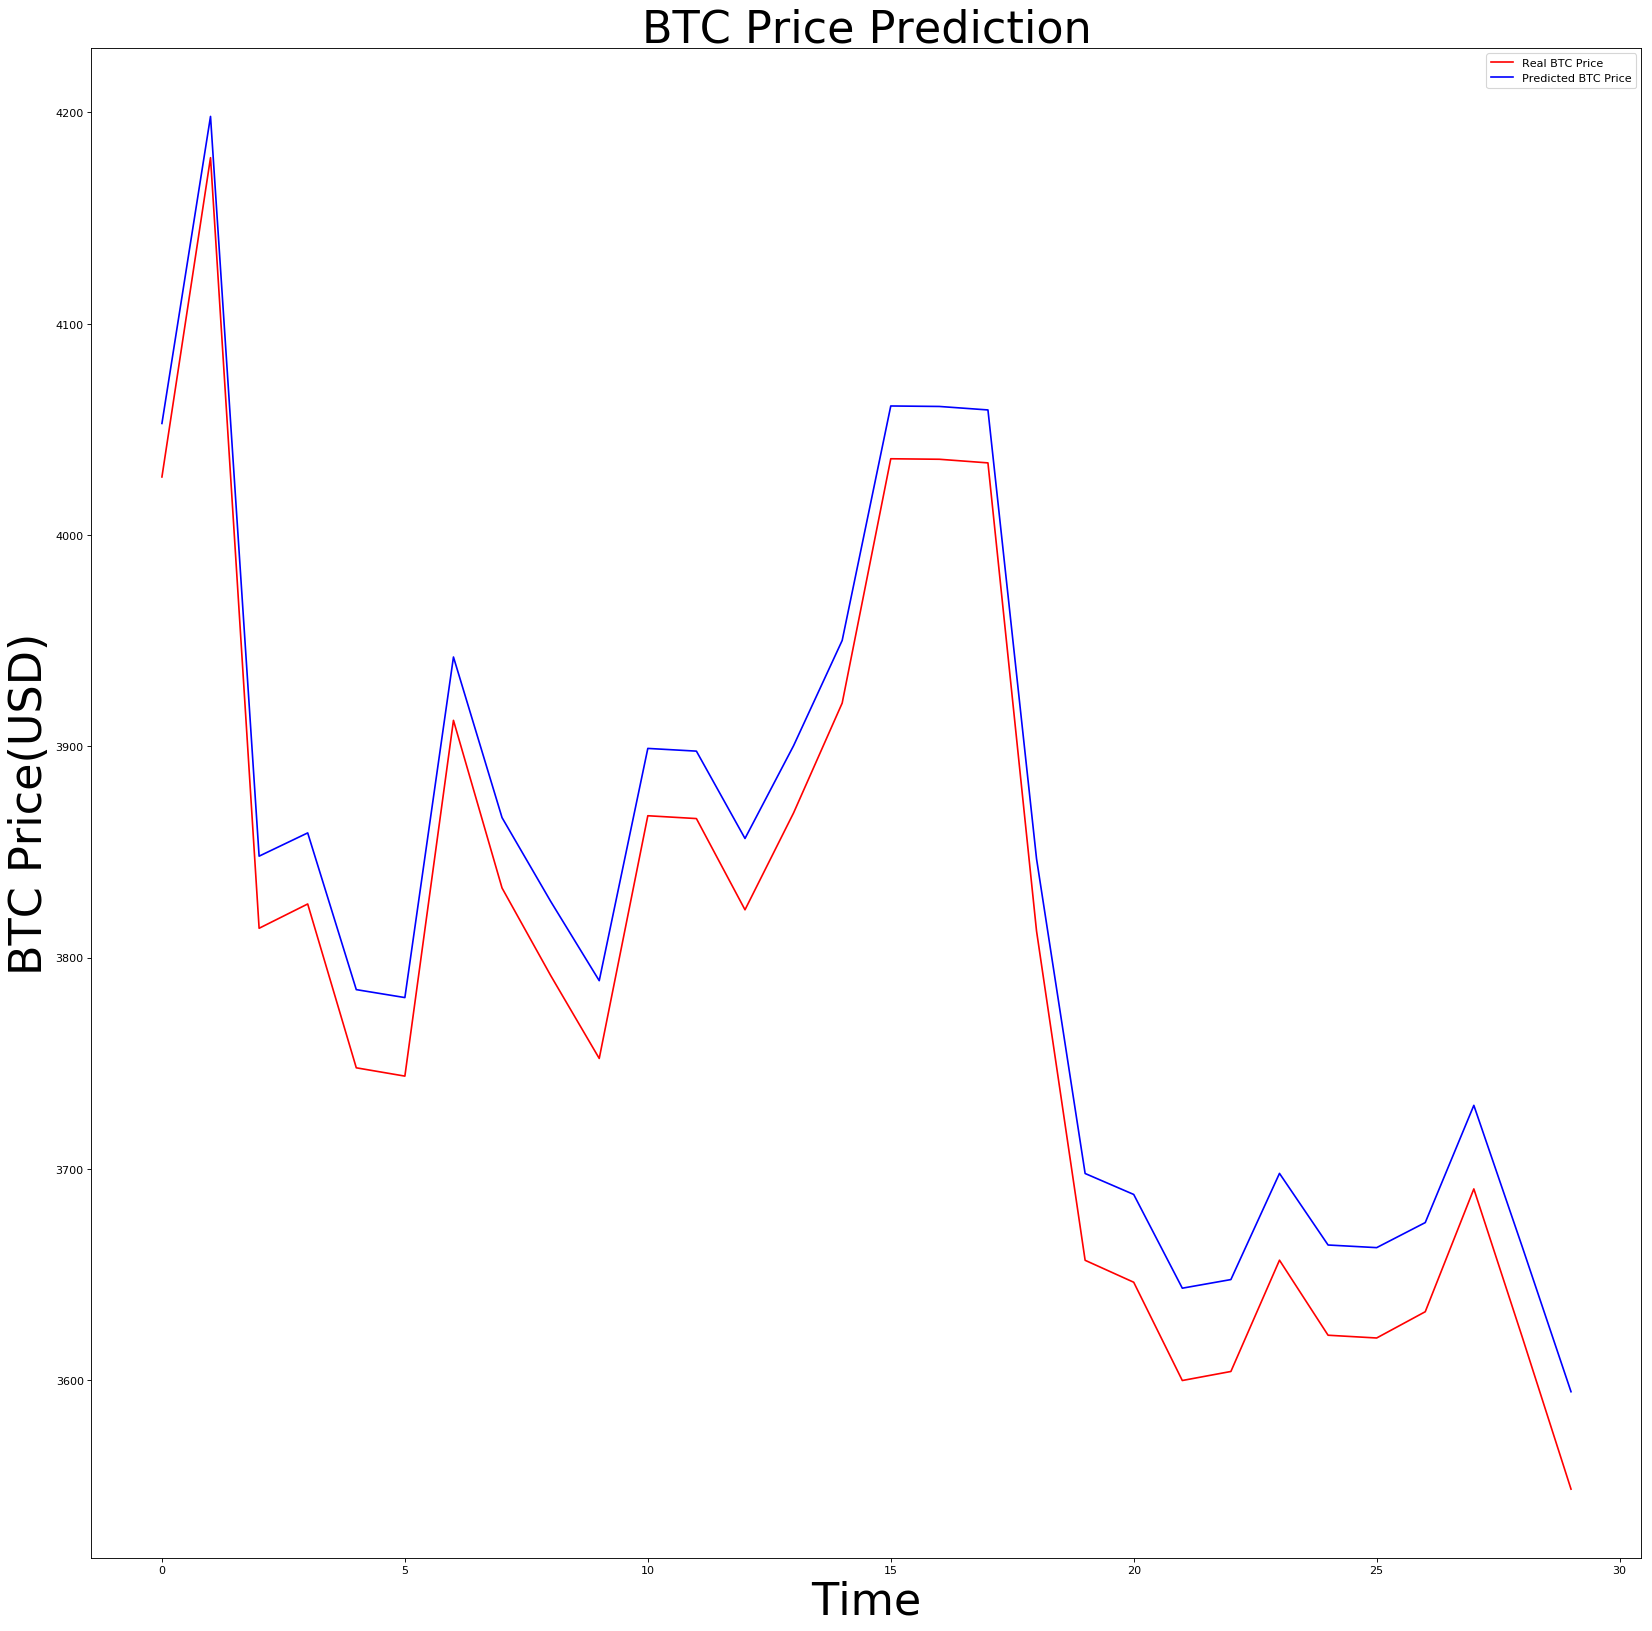

In [19]:
plt.figure(figsize=(25, 25), dpi=80, facecolor = 'w', edgecolor = 'k')

plt.plot(test_set[:, 0], color='red', label='Real BTC Price')
plt.plot(predicted_price[:, 0], color = 'blue', label = 'Predicted BTC Price')

plt.title('BTC Price Prediction', fontsize = 40)
plt.xlabel('Time', fontsize=40)
plt.ylabel('BTC Price(USD)', fontsize = 40)
plt.legend(loc = 'best')
plt.show()